In [66]:
import numpy as np
import matplotlib.pyplot as plt

class lattice2d():
  
    def __init__(self,n1,n2,T,B=1,J=1):
        self.n1 = n1
        self.n2 = n2
        self.N = n1 * n2
        self.matrix = np.random.choice([-1, 1], size=(self.n1, self.n2))
        self.ham = [] 
        self.mag = []
        self.B = B
        self.J = J
        self.T = T

    # Compute the interaction between one spin and first neighbors
    def get_onepoint_interaction(self,i,j):
        interaction = - self.J * self.matrix[i,j] * (self.matrix[(i+1)%self.n1,j]+self.matrix[i-1,j]+self.matrix[i,(j+1)%self.n2]+self.matrix[i,j-1])
        return(interaction)
    
    
    def get_mf_deltaE(self,i,j):
        self.update_mag()
        s = self.matrix[i,j]
        J = self.J
        B = self.B
        N = self.n1 * self.n2
        mf = self.mag[-1] 
        deltaE = s * (8*J*mf-2*B) - 8*J/N
        return deltaE
    """

    def get_mf_interaction(self,i,j):
        self.update_mag()
        mf = self.mag[-1] / (self.n1*self.n2)
        heff = self.B + mf * self.J * 4
        interaction = self.J * mf**2 * 4 * (self.n1*self.n2)/2 - heff * mf * (self.n1*self.n2)
        return interaction
    """
    
    def get_total_interaction(self):
        # list of pairs of adjacent sites as four-element tuples:
        # (i1, j1, i2, j2) represents two adjacent sites located
        # at (i1, j1) and (i2, j2)
        horizontal_edges = [
            (i, j-1, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        vertical_edges = [
            (i-1, j, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        # summing lists in python concatenates them
        # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
        edges = horizontal_edges + vertical_edges
        E = 0
        for i1, j1, i2, j2 in edges:
            E -= self.matrix[i1,j1]*self.matrix[i2,j2]
        return E                                               


    def update_ham(self):
        # Compute the energy of interactions
        h = self.get_total_interaction()
        # Compute the energy of external field
        self.update_mag()
        h += self.B * self.mag[-1] * self.N
        self.ham.append(h)


    def update_mag(self):
        m = self.mag.append(np.sum(self.matrix) / self.N)

    def flip_one_point(self, i, j):
        self.matrix[i,j] = self.matrix[i,j] * (-1)
              
    def heatmap(self):
        fig, ax = plt.subplots()
        im = ax.imshow(self.matrix, cmap = 'binary')
        plt.show()

    # deltaE -> difference btw final energy and initial energy of the single point (before and after the eventual swap)
    def metropolis(self, n_updates):
        for _ in range(n_updates):
            i = np.random.randint(self.n1)
            j = np.random.randint(self.n2)
            E_i = self.get_onepoint_interaction(i, j)
            deltaE = - 2 * self.matrix[i,j] * self.B - 2 * E_i
            if deltaE < 0:
                self.flip_one_point(i, j)
            else:
                # what is k_B???
                if np.random.uniform() < np.exp(-deltaE/self.T):
                    self.flip_one_point(i, j)
              
    # from where we get this method? I don't know if this is the mean field theory
    
    """
    def metropolis_mf(self, n_updates):
        for _ in range(n_updates):
            i = np.random.randint(self.n1)
            j = np.random.randint(self.n2)
            E_i = self.get_mf_interaction(i, j)
            deltaE = - 2 * self.matrix[i,j] * self.B - 2 * E_i
            if deltaE < 0:
                self.flip_one_point(i, j)
            else:
                # what is k_B???
                if np.random.uniform() < np.exp(-deltaE/self.T):
                    self.flip_one_point(i, j)
    """                
    
    def metropolis_mf(self, n_updates):
        for _ in range(n_updates):
            i = np.random.randint(self.n1)
            j = np.random.randint(self.n2)
            deltaE = self.get_mf_deltaE(i, j)
            if deltaE < 0:
                self.flip_one_point(i, j)
            else:
                # what is k_B???
                if np.random.uniform() < np.exp(-deltaE/self.T):
                    self.flip_one_point(i, j)

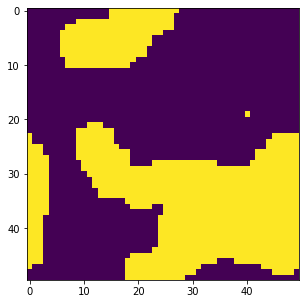

In [13]:
from IPython import display

T_c = 2/np.log(1+np.sqrt(2))
T = 0.01

# create initial random configuration
ising = lattice2d(50, 50, T, 0, 1)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(ising.matrix)

for t in range(10000):
    # update the system
    ising.metropolis(10)
    # replot every 1000 MC updates
    if t%100==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(ising.matrix)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

KeyboardInterrupt: 

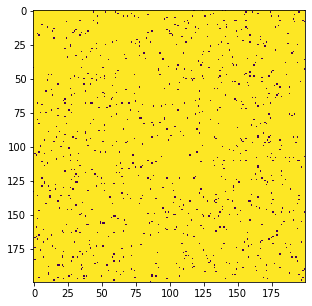

In [54]:
T = 2

# create initial random configuration
ising = lattice2d(200, 200, T, 0, 1)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(ising.matrix)

for t in range(10000):
    # update the system
    ising.metropolis_mf(50)
    # replot every 1000 MC updates
    if t%100==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(ising.matrix)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

In [64]:
test = lattice2d(75, 75, 2, 0, 1)
for _ in range(1000000):
    test.update_mag()
    test.metropolis(1)
plt.plot(test.mag)

KeyboardInterrupt: 

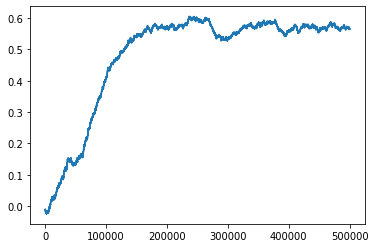

In [72]:
test = lattice2d(100, 100, 3.5, 0, 1)
for _ in range(500000):
    test.metropolis_mf(1)
plt.plot(test.mag)

In [21]:
# We create a function to compute couple of value for (magnetization, temperature)
# in order to check phase transition and the correctness of the value of T_c
# computed with the metropolis algorithm
'''
- perché non prendere in input un oggetto lattice2d? così sostituisci 4 input (n1,n2,B,J)
  con uno solo
- potremmo plottare l'andamento della magnetizzazione prima di eseguire
  così sappiamo dopo quante ripetizioni si stabilizza
'''
def compute_temp_mag(n1,n2,B,J,t1,t2,n_temperatures,n_repetitions):
    temperatures = np.linspace(t1,t2,n_temperatures)
    magnetizations = np.zeros(n_temperatures)
    for i,t in enumerate (temperatures):
        ising = lattice2d(n1, n2, t, B, J)
        ising.metropolis(n_repetitions)
        ising.update_mag()
        magnetizations[i] = ising.mag[-1]/n1/n2
        print ( '[',t,',',magnetizations[i],']')
    return(temperatures, magnetizations)

In [26]:
temp, mag = compute_temp_mag(25,25,0,1,0.1,2.8,20,500000)

[ 0.1 , 0.28 ]
[ 0.24210526315789474 , -0.12 ]
[ 0.38421052631578945 , 1.0 ]
[ 0.5263157894736842 , -1.0 ]
[ 0.6684210526315789 , 1.0 ]
[ 0.8105263157894737 , -1.0 ]
[ 0.9526315789473684 , -1.0 ]
[ 1.0947368421052632 , 0.9968 ]
[ 1.236842105263158 , -0.9968 ]
[ 1.3789473684210527 , 0.6607999999999999 ]
[ 1.5210526315789474 , -0.9776 ]
[ 1.6631578947368422 , -0.968 ]
[ 1.805263157894737 , 0.9551999999999999 ]
[ 1.9473684210526316 , -0.9264 ]
[ 2.0894736842105264 , 0.9007999999999999 ]
[ 2.2315789473684213 , -0.7631999999999999 ]
[ 2.373684210526316 , -0.488 ]
[ 2.5157894736842104 , 0.41119999999999995 ]
[ 2.6578947368421053 , 0.1328 ]
[ 2.8 , -0.1264 ]


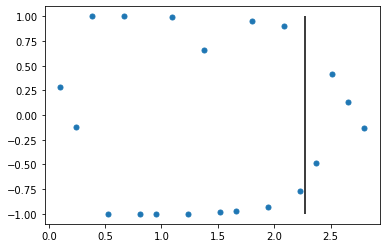

In [27]:
plt.plot(temp, mag,'.', markersize=10)
plt.vlines(T_c,-1,+1)

[ 2.2 , -0.8240000000000001 ]
[ 2.3000000000000003 , 0.18719999999999998 ]
[ 2.4000000000000004 , 0.5871999999999999 ]
[ 2.5 , -0.1168 ]
[ 2.6 , -0.2736 ]


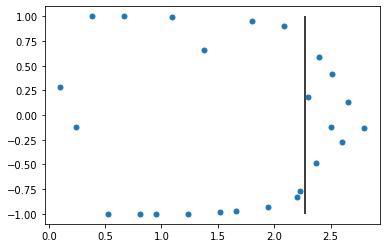

In [28]:
temp2, mag2 = compute_temp_mag(25,25,0,1,2.2,2.6,5,500000)
temp = np.append(temp,temp2)
mag = np.append(mag,mag2)
plt.plot(temp, mag,'.', markersize=10)
plt.vlines(T_c,-1,+1)

In [74]:
# We create a function to compute couple of value for (magnetization, temperature)
# in order to check phase transition and the correctness of the value of T_c
# computed following the mean field approach
def compute_temp_mag_mf(n1,n2,B,J,t1,t2,n_temperatures,n_repetitions):
    temperatures = np.linspace(t1,t2,n_temperatures)
    magnetizations = np.zeros(n_temperatures)
    for i,t in enumerate (temperatures):
        ising = lattice2d(n1, n2, t, B, J)
        ising.metropolis_mf(n_repetitions)
        ising.update_mag()
        magnetizations[i] = ising.mag[-1]
        print ( '[',t,',',magnetizations[i],']')

    return(temperatures, magnetizations)

In [75]:
temp_mf, mag_mf = compute_temp_mag_mf(100,100,0,1,2.5,5,10,500000)


[ 2.5 , 0.8816 ]
[ 2.7777777777777777 , -0.8334 ]
[ 3.0555555555555554 , -0.761 ]
[ 3.3333333333333335 , -0.6536 ]
[ 3.611111111111111 , 0.5322 ]
[ 3.888888888888889 , 0.2824 ]
[ 4.166666666666667 , -0.0264 ]
[ 4.444444444444445 , -0.003 ]
[ 4.722222222222222 , 0.005 ]
[ 5.0 , 0.001 ]


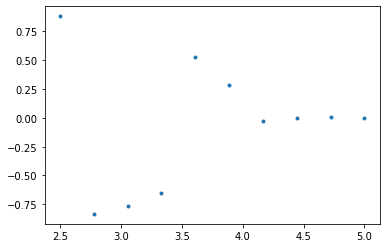

In [76]:
plt.plot(temp_mf,mag_mf,'.')

In [78]:
temp_m1f, mag_mf1 = compute_temp_mag_mf(25,25,0,1,3.5,4.3,10,500000)


[ 3.5 , -0.5872 ]
[ 3.588888888888889 , 0.4656 ]
[ 3.6777777777777776 , -0.5456 ]
[ 3.7666666666666666 , 0.3152 ]
[ 3.8555555555555556 , 0.3376 ]
[ 3.944444444444444 , 0.1296 ]
[ 4.033333333333333 , -0.3568 ]
[ 4.122222222222222 , -0.1808 ]
[ 4.211111111111111 , -0.0752 ]
[ 4.3 , 0.152 ]


In [79]:
temp_mf = np.append(temp_mf,temp_m1f)
mag_mf = np.append(mag_mf,mag_mf1)

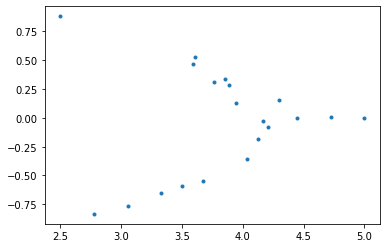

In [80]:
plt.plot(temp_mf,mag_mf,'.')
